<a href="https://colab.research.google.com/github/space-owner/Tensorflow-2/blob/main/Transfer%20Learning%20and%20Fine%20Tune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Transfer learning and fine-tuning***
This post is **based on the Tensorflow tutorial** for study purposes. [Link](https://www.tensorflow.org/tutorials)

***Learning Point:***
- **```tf.keras.preprocessing.image_dataset_from_directory()```**
- **```tf.data.experimental.cardinality()```**
- **```tf.data.AUTOTUNE```**
- **```prefetch()```**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
print("tf_version =", tf.__version__)

tf_version = 2.6.0


In [2]:
DATA_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

download_path = tf.keras.utils.get_file(
    'cats_and_dogs.zip', origin=DATA_URL, extract=True
)
print(">>> download_path =", download_path)

>>> download_path = /root/.keras/datasets/cats_and_dogs.zip


In [3]:
print(">>> download_list =", os.listdir(
    os.path.abspath(os.path.dirname(download_path)))
)

>>> download_list = ['cats_and_dogs_filtered', 'cats_and_dogs.zip']


In [4]:
data_path = os.path.join(
    os.path.dirname(download_path), "cats_and_dogs_filtered"
)
print(">>> data_path =", data_path)

>>> data_path = /root/.keras/datasets/cats_and_dogs_filtered


In [5]:
print(">>> dir_in_data_path =", os.listdir(data_path))

>>> dir_in_data_path = ['vectorize.py', 'train', 'validation']


In [6]:
train_dir = os.path.join(data_path, "train")
print(">>> train_dir =", train_dir)

val_dir = os.path.join(data_path, "validation")
print(">>> val_dir =", val_dir)

>>> train_dir = /root/.keras/datasets/cats_and_dogs_filtered/train
>>> val_dir = /root/.keras/datasets/cats_and_dogs_filtered/validation


In [7]:
BATCH_SIZE = 32
IMAGE_SIZE = (160, 160)

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE
)
print(">>> train_shape = ", train_dataset)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE
)
print(">>> val_shape = ", val_dataset)

Found 2000 files belonging to 2 classes.
>>> train_shape =  <BatchDataset shapes: ((None, 160, 160, 3), (None,)), types: (tf.float32, tf.int32)>
Found 1000 files belonging to 2 classes.
>>> val_shape =  <BatchDataset shapes: ((None, 160, 160, 3), (None,)), types: (tf.float32, tf.int32)>


>>> class_names = ['cats', 'dogs']


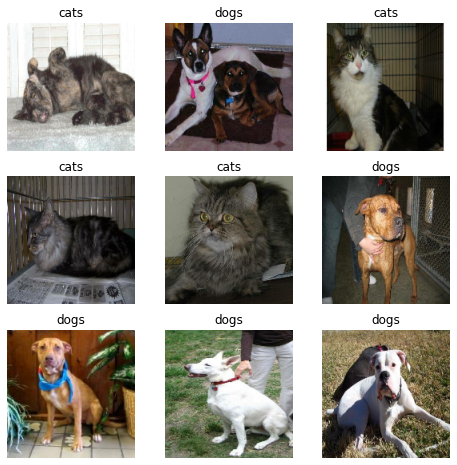

In [8]:
class_names = train_dataset.class_names
print(">>> class_names =", class_names)

plt.figure(figsize=(8, 8))
for image, label in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [9]:
val_batches = tf.data.experimental.cardinality(val_dataset)
print(
    ">>> val_batches_count =", val_batches
)
print(">>> = (dataset_size / batch_size) = ", 1000 / 32)

>>> val_batches_count = tf.Tensor(32, shape=(), dtype=int64)
>>> = (dataset_size / batch_size) =  31.25


In [10]:
TEST_SIZE = val_batches // 5

test_dataset = val_dataset.take(TEST_SIZE)
val_dataset = val_dataset.skip(TEST_SIZE)

print("val_dataset_size = {} ({})".format(
    tf.data.experimental.cardinality(val_dataset).numpy(),
    (tf.data.experimental.cardinality(val_dataset) / val_batches).numpy())
    
)
print("test_dataset_size = {} ({}%)".format(
    tf.data.experimental.cardinality(test_dataset).numpy(),
    (tf.data.experimental.cardinality(test_dataset) / val_batches))
)

val_dataset_size = 26 (0.8125)
test_dataset_size = 6 (0.1875%)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [12]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

first_image_shape = (160, 160, 3)
expand_dims_with_first_image = (1, 160, 160, 3)


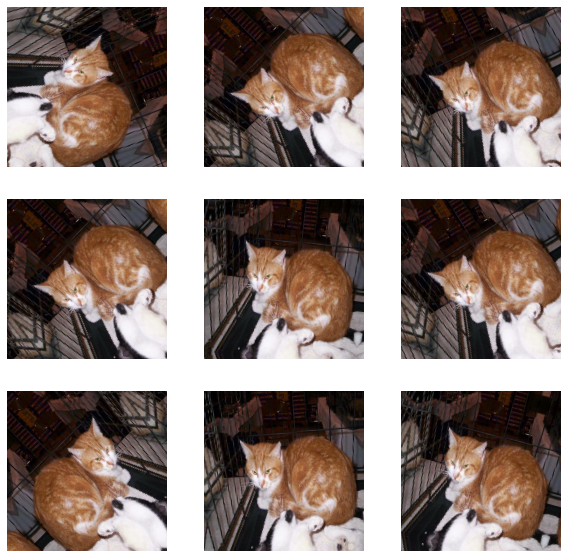

In [13]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    
    first_image = image[0]
    print("first_image_shape =", first_image.shape)
    
    print("expand_dims_with_first_image =",
        tf.expand_dims(first_image, 0).shape
    )
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [14]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [15]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(
    1./127.5, offset= -1
)

In [16]:
IMAGE_SHAPE = IMAGE_SIZE + (3, )
print(">>> image_shape =", IMAGE_SHAPE)

base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMAGE_SHAPE, include_top=False, weights='imagenet'
)

>>> image_shape = (160, 160, 3)
9420800/9406464 [==============================] - 0s 0us/step


In [17]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(">>> feature_batch_shape =", feature_batch.shape)

>>> feature_batch_shape = (32, 5, 5, 1280)


In [18]:
# >>> Transfer.

In [19]:
base_model.trainable = False # * It's not fine-tune.

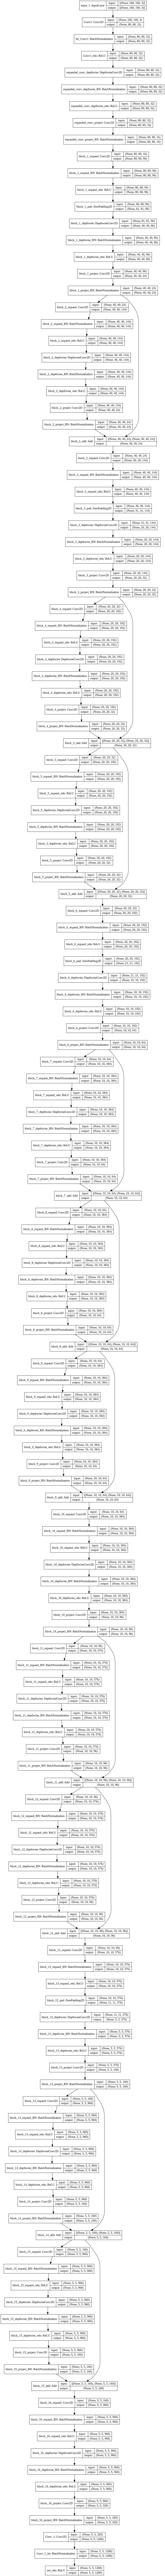

In [20]:
# base_model.summary()
tf.keras.utils.plot_model(base_model, show_shapes=True)

In [21]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(">>> feature_batch_average =", feature_batch_average.shape)

>>> feature_batch_average = (32, 1280)


In [23]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(">>> prediction_batch =", prediction_batch.shape)

>>> prediction_batch = (32, 1)


In [40]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

base_learning_rate = 1e-3
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

print(">>> len_model.trainable_variables =", len(model.trainable_variables))

>>> len_model.trainable_variables = 2


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


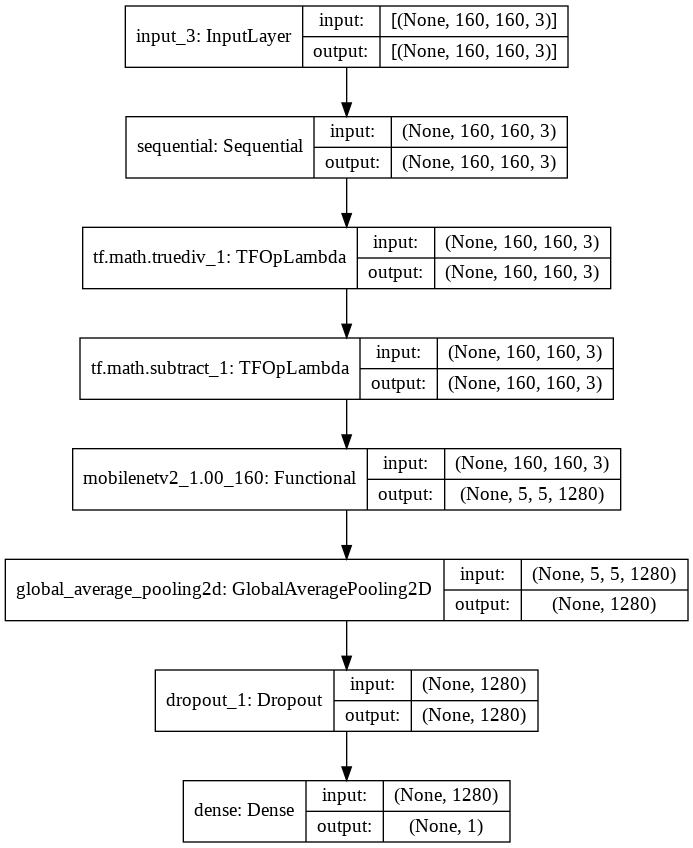

In [41]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [26]:
len(model.trainable_variables)

2

In [27]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_dataset)

26/26 [==============================] - 4s 61ms/step - loss: 0.7609 - accuracy: 0.5186


In [28]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.76
initial accuracy: 0.52


In [29]:
history = model.fit(
    train_dataset,
    epochs=initial_epochs,
    validation_data=val_dataset
)

Epoch 1/10
63/63 [==============================] - 10s 94ms/step - loss: 0.3102 - accuracy: 0.8510 - val_loss: 0.1094 - val_accuracy: 0.9653
Epoch 2/10
63/63 [==============================] - 6s 85ms/step - loss: 0.1676 - accuracy: 0.9305 - val_loss: 0.0787 - val_accuracy: 0.9728
Epoch 3/10
63/63 [==============================] - 6s 86ms/step - loss: 0.1389 - accuracy: 0.9410 - val_loss: 0.0745 - val_accuracy: 0.9678
Epoch 4/10
63/63 [==============================] - 6s 86ms/step - loss: 0.1339 - accuracy: 0.9435 - val_loss: 0.0572 - val_accuracy: 0.9851
Epoch 5/10
63/63 [==============================] - 6s 86ms/step - loss: 0.1137 - accuracy: 0.9535 - val_loss: 0.0554 - val_accuracy: 0.9827
Epoch 6/10
63/63 [==============================] - 6s 84ms/step - loss: 0.1200 - accuracy: 0.9485 - val_loss: 0.0540 - val_accuracy: 0.9839
Epoch 7/10
63/63 [==============================] - 6s 84ms/step - loss: 0.1049 - accuracy: 0.9560 - val_loss: 0.0497 - val_accuracy: 0.9814
Epoch 8/10
6

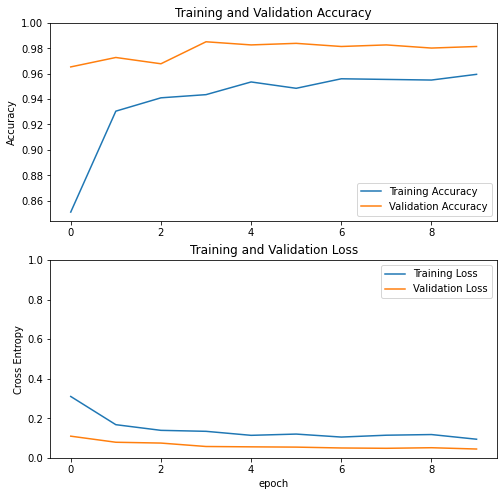

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# >>> Fine-Tune.

In [36]:
base_model.trainable = True

# tf.keras.utils.plot_model(base_model, show_shapes=True)

In [44]:
print(">>> base_model_layers =", base_model.layers)

print(">>> number_of_base_model_layers =", len(base_model.layers))

fine_tune_at = 100
print(">>> fine_tune_at =", fine_tune_at)

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

>>> base_model_layers = [<keras.engine.input_layer.InputLayer object at 0x7f9b50286990>, <keras.layers.convolutional.Conv2D object at 0x7f9b5016a990>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f9b611dad10>, <keras.layers.advanced_activations.ReLU object at 0x7f9b50123ed0>, <keras.layers.convolutional.DepthwiseConv2D object at 0x7f9b500fb6d0>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f9b50107910>, <keras.layers.advanced_activations.ReLU object at 0x7f9b50195f10>, <keras.layers.convolutional.Conv2D object at 0x7f9b500a2ad0>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f9b500a2890>, <keras.layers.convolutional.Conv2D object at 0x7f9b500a9e10>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f9b500a6ad0>, <keras.layers.advanced_activations.ReLU object at 0x7f9b500bd690>, <keras.layers.convolutional.ZeroPadding2D object at 0x7f9b500bd450>, <keras.l

In [43]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv_1 (TFOpLambd (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract_1 (TFOpLamb (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
